In [2]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser

pn.extension()

%matplotlib inline

In [3]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from ProcessingTools import DateProcessingTools

In [4]:
# Build tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)


In [5]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)

In [6]:
atlas.head()

,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Service Start,Service End
Customers,,,,,,,
University 1,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00
University 102,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00
University 3,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,2015-06-10 00:00:00-04:00,2016-06-30 00:00:00-04:00
University 4,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00
University 5,2015-10-07 00:00:00-04:00,AJ504,750.0,1 Year,4700-0-00-00000-20-0000,2015-10-05 00:00:00-04:00,2016-09-30 00:00:00-04:00


<AxesSubplot:title={'center':'Invoice Amount over Time'}, xlabel='Service Start'>

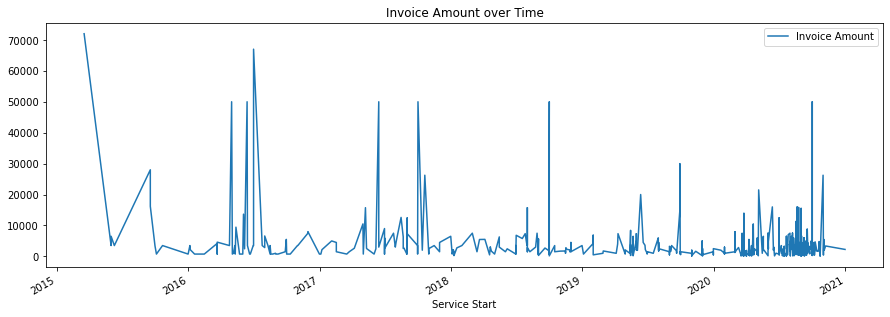

In [7]:
atlas.plot.line(x="Service Start", y="Invoice Amount", figsize=(15, 5), title="Invoice Amount over Time")

<AxesSubplot:ylabel='Invoice Amount'>

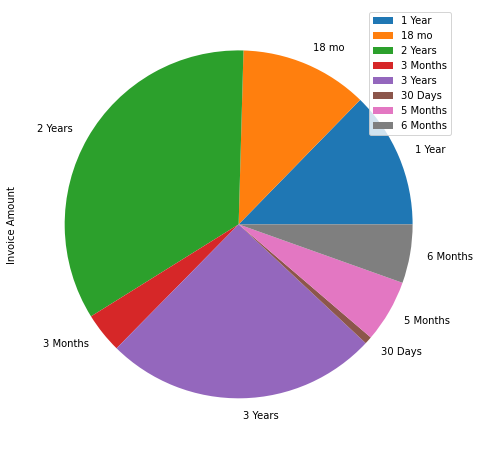

In [8]:
atlas.groupby(["Subscription"]).mean().plot.pie(x="Customers", y="Invoice Amount", figsize=(8, 8))

<AxesSubplot:ylabel='Invoice Amount'>

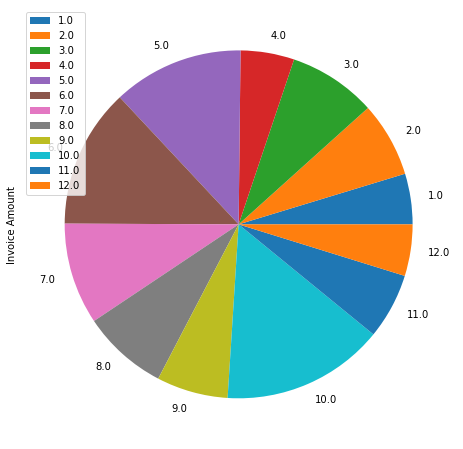

In [9]:
# Extract y/m/q for service start
atlas_ymq = tool_data_processing.extract_and_append_year_month_quarter(atlas, "Service Start")

# Display average customer amount invoiced per year, month, or day
atlas_ymq.groupby(["Monthly"]).mean().plot.pie(x="Customers", y="Invoice Amount", figsize=(8, 8))

In [10]:
forecast.head()

,Mailing State/Province,Organization Record Type,ATLAS Customer Type,Subscription Fee,Subscription Type,Contract Start Date,Contract End Date
Organization Name,,,,,,,
University 1,AL,College/University,System Wide IHE,62.6,3-Month,2020-04-01 00:00:00-04:00,2020-06-30 00:00:00-04:00
University 2,GA,College/University,Teacher Prep Program,250.0,3-Month,2020-03-24 00:00:00-04:00,2020-06-30 00:00:00-04:00
University 3,GU,College/University,NaN,250.0,3-Month,2020-03-25 00:00:00-04:00,2020-06-30 00:00:00-04:00
University 4,Hawaii,College/University,Teacher Prep Program,425.0,3-Month,2020-03-25 00:00:00-04:00,2020-06-30 00:00:00-04:00
University 92,North Dakota,General Organization,NaN,425.0,3-Month,2020-04-09 00:00:00-04:00,2020-06-30 00:00:00-04:00


<AxesSubplot:ylabel='Subscription Fee'>

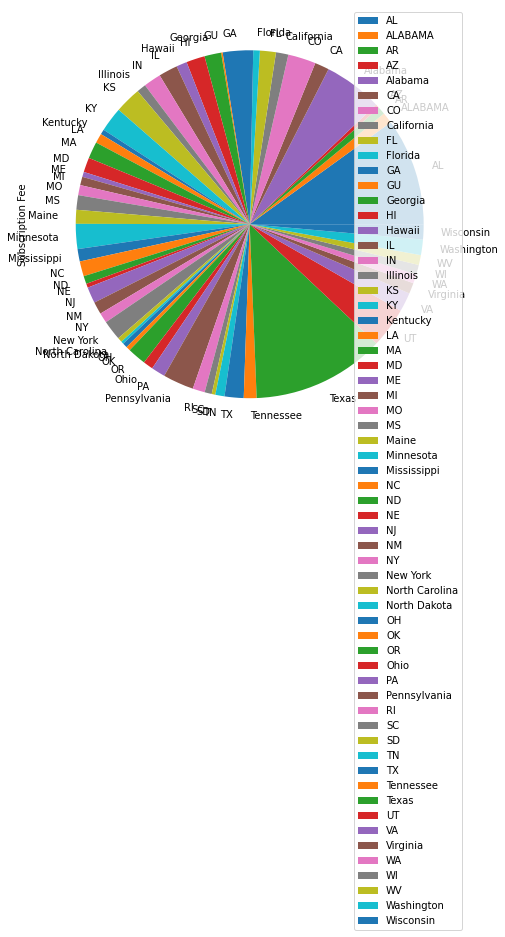

In [11]:
forecast.groupby(["Mailing State/Province"]).mean().plot.pie(x="Mailing State/Province", y="Subscription Fee", figsize=(8, 8))

<AxesSubplot:title={'center':'Subscription Fee over Time'}, xlabel='Contract Start Date'>

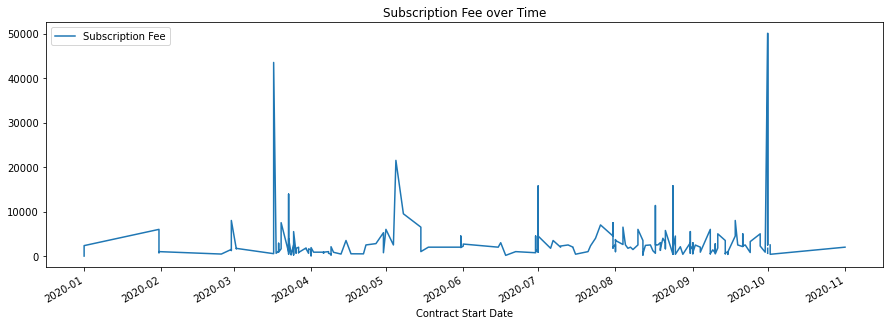

In [12]:
forecast.plot.line(x="Contract Start Date", y="Subscription Fee", figsize=(15, 5), title="Subscription Fee over Time")

<AxesSubplot:ylabel='Subscription Fee'>

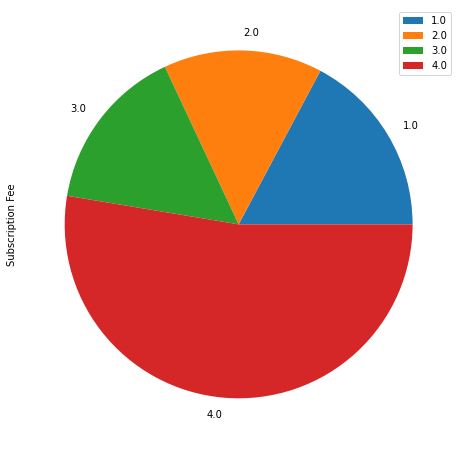

In [13]:
# Extract y/m/q for service start
forecast_ymq = tool_data_processing.extract_and_append_year_month_quarter(forecast, "Contract Start Date")

# Display average customer amount invoiced per year, month, or day
forecast_ymq.groupby(["Quarterly"]).mean().plot.pie(x="Quarterly", y="Subscription Fee", figsize=(8, 8))

<AxesSubplot:ylabel='Subscription Fee'>

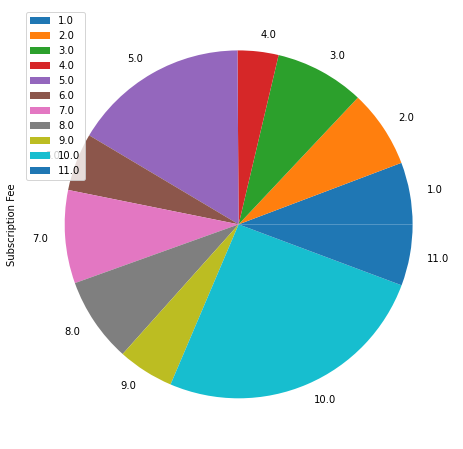

In [14]:
forecast_ymq.groupby(["Monthly"]).mean().plot.pie(x="Monthly", y="Subscription Fee", figsize=(8, 8))

<AxesSubplot:xlabel='Monthly'>

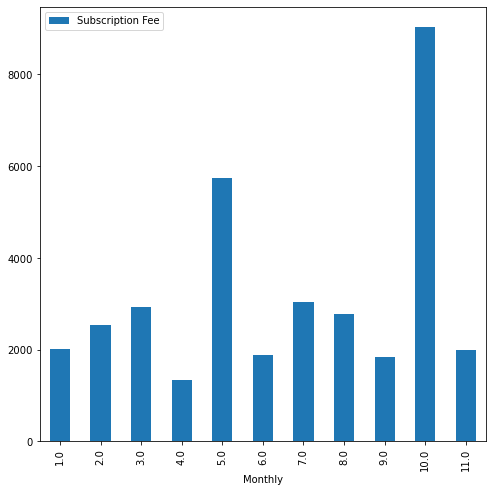

In [15]:
forecast_ymq.groupby(["Monthly"]).mean().reset_index().plot.bar(x="Monthly", y="Subscription Fee", figsize=(8, 8))

In [16]:
revenue2020.head()

,Month,Total,Month_Dateformat
Name,,,
University 1,Jan,1820.00,2020-01-11 00:00:00-05:00
University 2,Jan,1890.00,2020-01-11 00:00:00-05:00
University 3,Jan,883.33,2020-01-11 00:00:00-05:00
University 4,Jan,1200.00,2020-01-11 00:00:00-05:00
University 5,Jan,1166.67,2020-01-11 00:00:00-05:00


<AxesSubplot:xlabel='Month'>

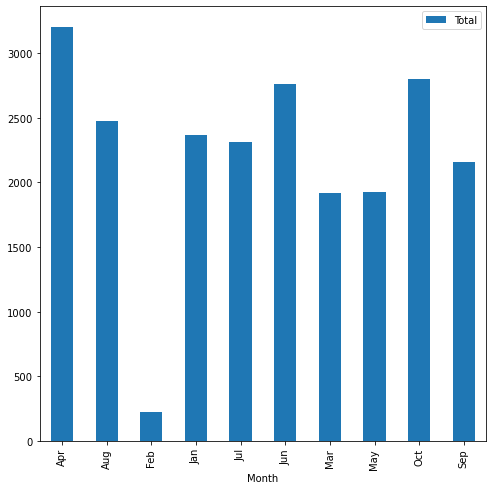

In [17]:
revenue2020.groupby(["Month"]).mean().reset_index().plot.bar(x="Month", y="Total", figsize=(8, 8))

In [18]:
revenue2020A.head()

,Invoice Date,Invoice #,Vendor ID,Invoice Amount,Account Code,Mail Date,Amount Paid,Pymt Received,Service Start,Service End
Payee Name,,,,,,,,,,
University 1,2019-11-18 00:00:00-05:00,241.0,NaN,200.0,4700-0-00-00000-00-0000,2019-11-18 00:00:00-05:00,200.0,2020-01-08 00:00:00-05:00,2019-05-22 00:00:00-04:00,2022-05-31 00:00:00-04:00
University 2,2019-12-16 00:00:00-05:00,248.0,NaN,2500.0,4700-0-00-00000-00-0000,2019-12-16 00:00:00-05:00,2500.0,2020-01-09 00:00:00-05:00,NaT,2020-12-31 00:00:00-05:00
University 3,2019-11-18 00:00:00-05:00,240.0,NaN,1250.0,4700-0-00-00000-00-0000,2019-11-18 00:00:00-05:00,1250.0,2020-01-10 00:00:00-05:00,2019-12-31 00:00:00-05:00,2020-12-31 00:00:00-05:00
University 4,2019-11-18 00:00:00-05:00,212.0,NaN,500.0,4700-0-00-00000-00-0000,2019-11-18 00:00:00-05:00,500.0,2020-01-13 00:00:00-05:00,2019-08-31 00:00:00-04:00,2020-08-31 00:00:00-04:00
University 5,2019-11-20 00:00:00-05:00,244.0,NaN,250.0,4700-0-00-00000-00-0000,2019-11-20 00:00:00-05:00,250.0,2020-01-13 00:00:00-05:00,2019-11-30 00:00:00-05:00,2020-11-30 00:00:00-05:00


<AxesSubplot:title={'center':'Invoice Amount over Time'}, xlabel='Service Start'>

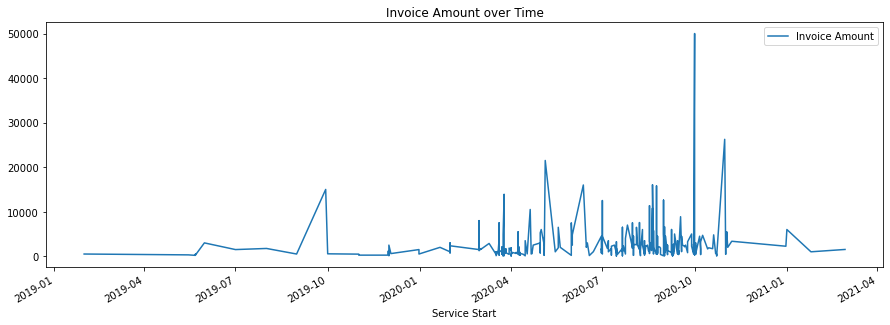

In [19]:
revenue2020A.plot.line(x="Service Start", y="Invoice Amount", figsize=(15, 5), title="Invoice Amount over Time")

<AxesSubplot:ylabel='Invoice Amount'>

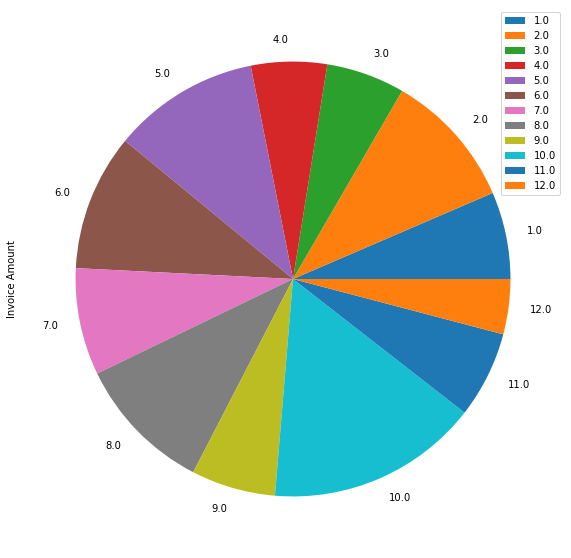

In [23]:
# Extract y/m/q for service start
revenue2020A_ymq = tool_data_processing.extract_and_append_year_month_quarter(revenue2020A, "Service Start")

# Display average customer amount invoiced per year, month, or day
revenue2020A_ymq.groupby(["Monthly"]).mean().plot.pie(x="Monthly", y="Invoice Amount", figsize=(10, 10))